<a href="https://colab.research.google.com/github/harsha361/pytorch_linreg/blob/main/pytorch_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [3]:
torch.__version__

'2.2.1+cu121'

In [4]:
weight=0.7
bias=0.3
start=0
end=1
step=0.02
x=torch.arange(start,end,step).unsqueeze(1)
y=weight*x+bias
x[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
#splitting data into train and test data.
trainsplit=int(0.8*len(x))
xtrain,ytrain=x[:trainsplit],y[:trainsplit]
xtest,ytest=x[trainsplit:],y[trainsplit:]


In [14]:
def plotpred(traindata=xtrain,trainlabel=ytrain,
             testdata=xtest,testlabel=ytest,predictions=None):
  plt.figure(figsize=(7,7))
  plt.scatter(traindata,trainlabel,c='b',s=4,label="trainingdata")
  plt.scatter(testdata,testlabel,c='g',s=4,label="testingdata")
  if predictions is not None:
    plt.scatter(testdata,predictions,c='r',label="predictions")
  plt.legend(prop={'size':10})



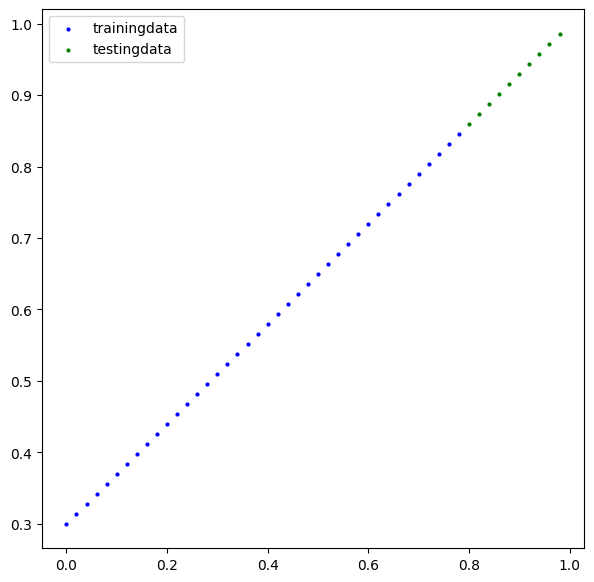

In [7]:
plotpred()

In [8]:
#create a linear regression model class.
class linregmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,out_features=1)
  def forward(self,x):
    return self.linear_layer(x)

torch.manual_seed(42)
model1=linregmodel()
model1,model1.state_dict()





(linregmodel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [9]:
#building a train and test loop.

lossfn=nn.L1Loss()
optimizer=torch.optim.SGD(model1.parameters(),lr=0.01)
epochs=1000
for epoch in range(epochs):
  ypred=model1(xtrain)
  loss=lossfn(ypred,ytrain)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model1.eval()
  with torch.inference_mode():
    testpred=model1(xtest)
    testloss=lossfn(testpred,ytest)
  if epoch%100==0:
    print(f"epoch:{epoch}| trainloss:{loss}'|testloss:{testloss}")



epoch:0| trainloss:0.5551779866218567'|testloss:0.5739762187004089
epoch:100| trainloss:0.006215679459273815'|testloss:0.014086711220443249
epoch:200| trainloss:0.0012645035749301314'|testloss:0.013801807537674904
epoch:300| trainloss:0.0012645035749301314'|testloss:0.013801807537674904
epoch:400| trainloss:0.0012645035749301314'|testloss:0.013801807537674904
epoch:500| trainloss:0.0012645035749301314'|testloss:0.013801807537674904
epoch:600| trainloss:0.0012645035749301314'|testloss:0.013801807537674904
epoch:700| trainloss:0.0012645035749301314'|testloss:0.013801807537674904
epoch:800| trainloss:0.0012645035749301314'|testloss:0.013801807537674904
epoch:900| trainloss:0.0012645035749301314'|testloss:0.013801807537674904


In [11]:
from pprint import pprint
print("the model learned the following as weights and bias")
pprint(model1.state_dict())
print(f"weights:{weight},bias:{bias}")



the model learned the following as weights and bias
OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])
weights:0.7,bias:0.3


In [12]:
#making predictions.
model1.eval()
with torch.inference_mode():
  ypreds=model1(xtest)
ypreds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

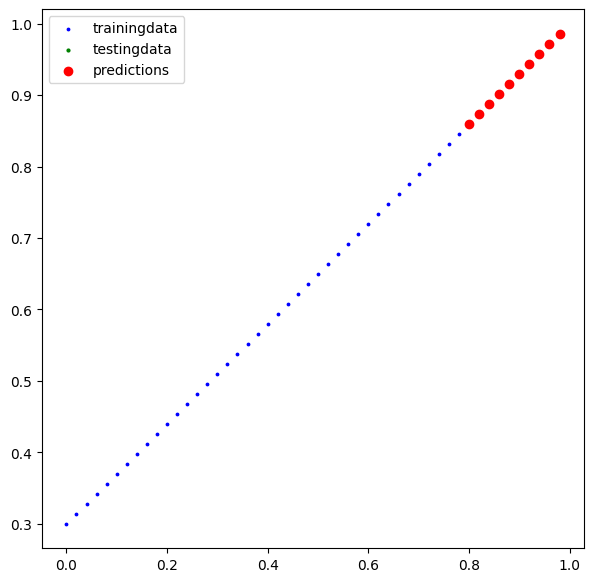

In [15]:
plotpred(predictions=ypreds)